# Problem 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

In [2]:
# (a)
fn='hw3p5.dat'
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])

In [3]:
def gauss_func(p,x): # gauss function
    xc=x-p[2]
    sig2=p[3]**2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

model=Model(gauss_func)

data=RealData(x,y)

odr=ODR(data,model,beta0=[0,-10,10,3]) # guessing initial value
out=odr.run()
out.pprint()
print("chi square : {}".format(out.sum_square))

Beta: [2.2459671  1.21002556 9.85323613 3.26831463]
Beta Std Error: [0.03225696 0.04023563 0.10167473 0.15084068]
Beta Covariance: [[ 2.65108338e-02 -2.05546476e-02  3.25071205e-05 -9.17732835e-02]
 [-2.05546476e-02  4.12475473e-02  6.12187167e-03  2.47641414e-02]
 [ 3.25071205e-05  6.12187167e-03  2.63392035e-01 -1.94035544e-02]
 [-9.17732835e-02  2.47641414e-02 -1.94035544e-02  5.79713691e-01]]
Residual Variance: 0.03924853139162934
Inverse Condition #: 0.025682681307379933
Reason(s) for Halting:
  Sum of squares convergence
chi square : 7.692712152759351


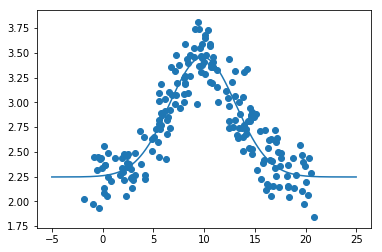

In [4]:
plt.scatter(x,y)
t=np.arange(-5,25,0.01)
plt.plot(t,out.beta[0]+out.beta[1]*np.exp(-0.5*(t-out.beta[2])**2/(out.beta[3]**2)))

In [5]:
# (b)
def Lorentz_func(p,x): # Lorentz function
    xc=x-p[3]
    return p[0]+p[1]/(p[2]+xc**2)

model=Model(Lorentz_func)

data=RealData(x,y)

odr=ODR(data,model,beta0=[2,100,10,10]) # guessing initial value
out=odr.run()
out.pprint()
out.sum_square
print("chi square : {}".format(out.sum_square))

Beta: [ 1.98483327 28.60658162 19.05777467  9.8159789 ]
Beta Std Error: [0.05842335 4.7672396  2.74738769 0.10289001]
Beta Covariance: [[ 8.68751083e-02 -6.64901132e+00 -3.55654573e+00 -2.23459157e-03]
 [-6.64901132e+00  5.78437442e+02  3.26805925e+02  1.17689627e-02]
 [-3.55654573e+00  3.26805925e+02  1.92115468e+02 -8.16363075e-02]
 [-2.23459157e-03  1.17689627e-02 -8.16363075e-02  2.69444226e-01]]
Residual Variance: 0.03928959599097544
Inverse Condition #: 0.014724065884690813
Reason(s) for Halting:
  Sum of squares convergence
chi square : 7.700760814231185


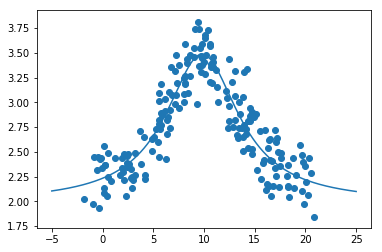

In [6]:
plt.scatter(x,y)
t=np.arange(-5,25,0.001)
plt.plot(t,out.beta[0]+out.beta[1]/(out.beta[2]+(t-out.beta[3])**2))

#### (c) gauss function 의 chi square 값이 lorentz function 의 chi square 값이 조금 작다. 따라서 gaussian fitting 이 더 낫다고 할 수 있다.

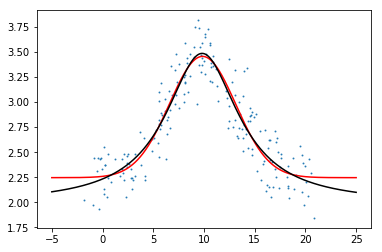

In [7]:
t=np.arange(-5,25,0.001)
gauss=[2.2459671,  1.21002556, 9.85323613, 3.26831463]
lorentz=[1.98483327, 28.60658162, 19.05777467,  9.8159789]
plt.scatter(x,y,alpha=0.9,s=0.9)
plt.plot(t,gauss[0]+gauss[1]*np.exp(-0.5*(t-gauss[2])**2/(gauss[3]**2)),'r') # gauss fitting
plt.plot(t,lorentz[0]+lorentz[1]/(lorentz[2]+(t-lorentz[3])**2),'k') # Lorentz fitting

# 빨간색 Gaussian fitting
# 검은색 lorentzian fitting